 #                                    Project 2018 - Box Plots

 ## 1. History and uses of box plots

John Tukey introduced the box and whiskers plot as part of his toolkit for exploratory data analysis. Over 40 years later, the boxplot has become one of the most frequently used tools for data visualisation
and is one of the few plot types invented in the 20th century that has found widespread adoption.

The box plot was originally designed to be computated and drawn by hand. The basic graphic form of the boxplot, the range-bar, was established in the early 1950’s by M. E. Spear in the book Charting Statistics.[1]

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.[2]


John Tukey has provided a precise definition for two types of outliers:

"Outliers are either 3×IQR or more above the third quartile or 3×IQR or more below the first quartile.
Suspected outliers are are slightly more central versions of outliers: either 1.5×IQR or more above the third quartile or 1.5×IQR or more below the first quartile.
If either type of outlier is present the whisker on the appropriate side is taken to 1.5×IQR from the quartile (the "inner fence") rather than the max or min, and individual outlying data points are displayed as unfilled circles (for suspected outliers) or filled circles (for outliers). (The "outer fence" is 3×IQR from the quartile.)" [3]







In [1]:
# import pandas library; pandas is a library used for data analysis and creating data structures in Python
import pandas as pa
# import numpy library; numpy is a statistical library used for data analysis using Python
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
dateCol = ['Date']
fx = pa.read_csv("https://raw.githubusercontent.com/donalcarr85/Datasets/master/eurofxref-hist.csv",
                 parse_dates=dateCol)

fx

,Date,AUD
0,2018-01-01,1.5565
1,2018-01-01,1.5525
2,2018-01-01,1.5595
3,2018-01-01,1.5631
4,2018-01-01,1.5664
5,2018-01-01,1.5708
6,2018-01-01,1.5721
7,2018-01-01,1.5725
8,2018-01-01,1.5712
9,2018-01-01,1.5660


In [3]:
fx["YearDate"]= pa.to_datetime(fx["Date"]) 

In [27]:
fx['Year'] = pa.DatetimeIndex(fx['Date']).year

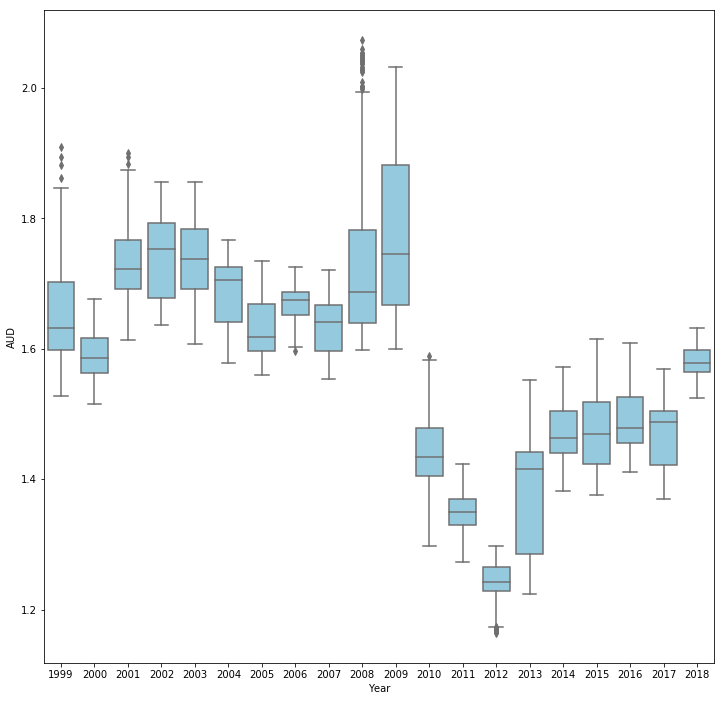

In [30]:
ax = sns.boxplot(x="Year", y="AUD", data=fx,color="skyblue")
plt.rcParams['figure.figsize']=(12,12)

In [36]:
print (fx.groupby('Year').describe().unstack(1))

            Year
AUD  count  1999    259.000000
            2000    255.000000
            2001    254.000000
            2002    255.000000
            2003    255.000000
            2004    259.000000
            2005    257.000000
            2006    255.000000
            2007    255.000000
            2008    256.000000
            2009    256.000000
            2010    258.000000
            2011    257.000000
            2012    256.000000
            2013    255.000000
            2014    255.000000
            2015    256.000000
            2016    257.000000
            2017    255.000000
            2018    236.000000
     mean   1999      1.652342
            2000      1.588947
            2001      1.731871
            2002      1.737645
            2003      1.737941
            2004      1.690489
            2005      1.631962
            2006      1.666811
            2007      1.634836
            2008      1.741623
                       ...    
     75%    2009      